In [1]:
# Se importan las bibliotecas
import random as rd    # Esta biblioteca es para generar y manejar datos aleatorios
import numpy as np     # Esta biblioteca es para manejar vectores y matrices facilmente
import pandas as pd    # Esta biblioteca es para manejar y leer datos desde un archivo externo de manera sencilla
import matplotlib.pyplot as plt      # Esta biblioteca es para mostrar los datos en una grafica de manera clara y elegante
from sklearn.cluster import KMeans   # Desde esta biblioteca se extrae la función KMeans para comparar nuetro resultado
import matplotlib.patches as mpatches

In [2]:
# Se crea una clase para manejar mejor los datos, con su agrupación e inercia
class Medida:
    def __init__(self, grupo, dato, distancia):
        self.dato = dato    # Se guarda el dato
        self.grupo = grupo  # Se guarda el grupo al cual pertenece el dato, el cual esta indexado con un numero entre 0 a k-1
        self.distancia = distancia # Se guarda la distancia al centroide del grupo

In [6]:
# Se definen las funciones necesarias para el algoritmo

def PROMEDIOS(k,Grupos):  # Esta función se utiliza para encontrar el valor promedio por grupo
    Promedios = []        # Se crea una lista vacia donde se guardaran los centros, ordenados igual que los grupos
    for i in range(k):    # Se calcula el valor promedio para cada grupo
        h = [x.dato for x in Grupos if x.grupo == i]    # Se crea una lista con todos lo datos por grupo
        p = sum(h)        # Se suman todos los datos
        if len(h) != 0:   # Se toma en cuenta que la lista no es vacia
            Promedios.append(p/len(h))      # Se calcula el promedio
        else:
            Promedios.append(rd.choice(Grupos).dato) # Para evitar grupos vacios se toma un dato arbitrario como un nuevo centro
    return Promedios      # Se regresa la lista de los promedios, que actuara como nuevos centroides

def KMEDIDAS(k,Datos):    # Esta función se utiliza para agrupar los datos
    Grupos = []           # Se crea una lista vacia donde se guardaran los datos convertidos en la clase de Medida
    Agrupacion = []       # Se crea una lista vacia donde se guardaran los grupos
    inercia = 0           # Se crea una variable para medir la inercia de los datos
    # Se crea una lista donde arbitrariamente se toman k datos que se utilizaran como los centroides iniciales
    Centroides = [rd.choice(Datos) for i in range(k)]

    for x in Datos:         # Se maneja inicialmente cada dato
        y = Medida(-1,x,-1) # Se crea una clase con cada dato, sin agruparlo ni darle una distancia valida
        for i in range(k):  # Se realiza la agrupación para los k grupos
            d = np.linalg.norm(x - Centroides[i])**2   # Se calcula la distancia entre el dato y el centroide
            if y.distancia >= d or y.distancia < 0:
            # Si la distancia es menor al centroide de su grupo (o es la primera medidida) se asignan el dato en un este grupo
                y.grupo = i       # Se asigna un grupo al dato
                y.distancia = d   # Se asigna la distancia del dato al centroide
        Grupos.append(y)    # Se guardan los datos aquí

    Promedios = PROMEDIOS(k,Grupos)   # Se calculan los promedios de cada grupo

    # Se realiza el siguiente algoritmo hasta que los promedios y los centros sean los mismos
    while not (np.array(Centroides) == np.array(Promedios)).all():
        Centroides = Promedios   # Los nuevos centroides corresponden a los antiguos promedios

        for x in Grupos:         # Se maneja cada dato
            x.distancia = -1     # Se asigna una distancia no valida para que no se tenga en cuenta la distancia anterior
            for i in range(k):   # Se realiza la nueva agrupación para los k grupos
                d = np.linalg.norm(x.dato - Centroides[i])**2   # Se calcula la distancia entre el dato y el centroide
                if x.distancia >= d or x.distancia < 0:
                # Si la distancia es menor al centroide de su grupo se asignan el dato en un este grupo
                    x.grupo = i       # Se asigna un grupo al dato
                    x.distancia = d   # Se asigna la distancia del dato al centroide

        Promedios = PROMEDIOS(k,Grupos) # Se calculan los promedios de cada grupo

    inercia = sum([x.distancia for x in Grupos])   # Se calcula la inercia sumando todas las distancias

    for i in range(k):   # Se guardan los grupos, los cuales esta indexado con un numero entre 0 a k-1
        # Se agrega una lista con los datos de cada grupo
        Agrupacion.append(np.array([x.dato for x in Grupos if x.grupo == i]))

    return np.array(Centroides),Agrupacion,inercia
    # Se regresa la lista de los centroides, las agrupaciones, y la inercia calculada

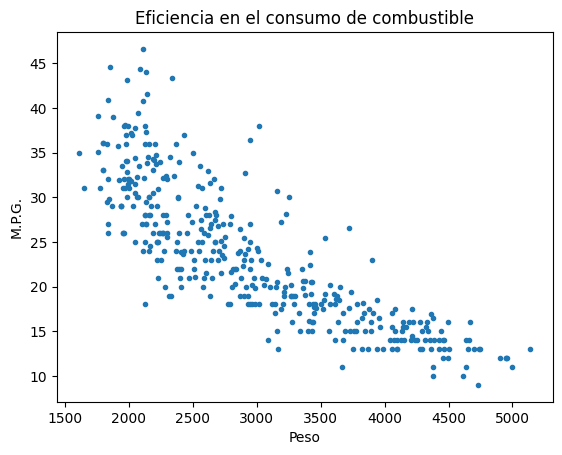

In [7]:
# Se leen los datos del archivo
Datos = pd.read_csv('mpg.csv', usecols = ["cylinders",'mpg', 'weight'])
# Se convierten los datos en una matriz para manejarlos correctamente
Datos = np.array([Datos['weight'].to_list(),Datos['mpg'].to_list()]).T

# Se grafican los datos iniciales
plt.scatter(Datos[:,0],Datos[:,1], marker=".")
plt.xlabel('Peso')
plt.ylabel('M.P.G.')
plt.title("Eficiencia en el consumo de combustible")
plt.show()

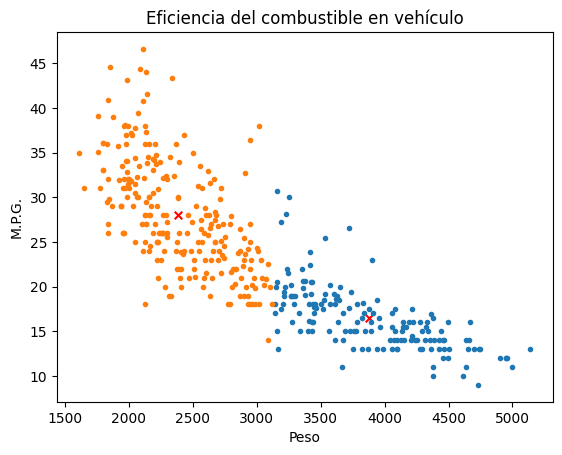

In [8]:
k = 2     # Se asignan el numero de agrupaciones para los datos
Centroides,Grupos,Inercia = KMEDIDAS(k,Datos)    # Se realiza el algoritmo realizado para la agrupación de k-medidas

# Se grafican los datos ya agrupados, junto con los centroides
for i in range(k):
    plt.plot(Grupos[i][:,0],Grupos[i][:,1],".")
plt.scatter(Centroides[:,0],Centroides[:,1], marker='x', s=30, c='red')

plt.xlabel('Peso')
plt.ylabel('M.P.G.')
plt.title("Eficiencia del combustible en vehículo")
plt.show()

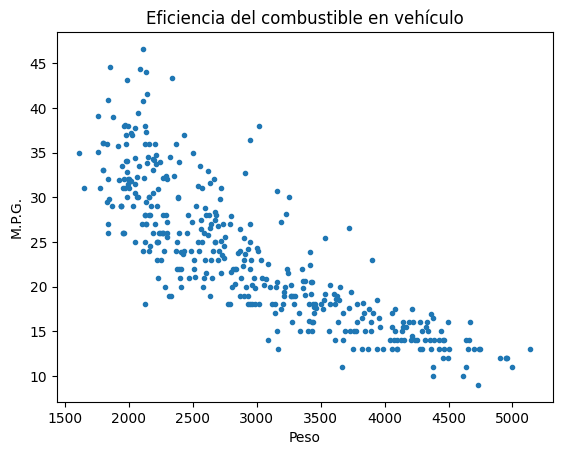

In [9]:
datos = pd.read_csv('mpg.csv', usecols = ["cylinders",'mpg', 'weight'])#Se leen los datos de las columnas de los cilindros, mpg y el peso del csv
datos = datos.dropna()#Se eliminan las filas con elementos faltantes, es decir NA
plt.scatter(datos['weight'],datos['mpg'], marker=".")# Se grafican los datos iniciales
plt.xlabel('Peso')
plt.ylabel('M.P.G.')
plt.title("Eficiencia del combustible en vehículo")
plt.show()

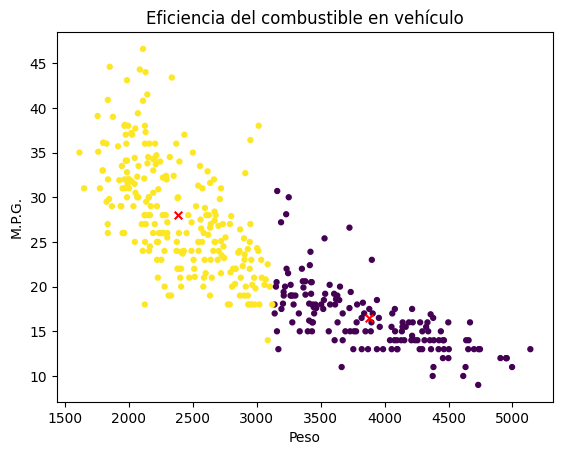

In [10]:
k = 2
datosd = datos.drop(columns=["cylinders"])#Se elimina la columna de los cilindros
SKL_Means = KMeans(n_clusters=k, random_state=1, n_init="auto").fit(datosd)#Se ajustan los datos iniciales a la función del algoritmo de K-medias
SKL_Centroides = SKL_Means.cluster_centers_#Se definen los centroides de los agrupamientos
SKL_Labels= SKL_Means.labels_#Se definen la etiquetas de los agrupamientos de los datos
plt.scatter(datosd['weight'],datosd['mpg'], marker=".", c=SKL_Means.labels_, s=50)#Se grafican los datos ajustados al algoritmo de K-medias
plt.scatter(SKL_Centroides[:, 1], SKL_Centroides[:, 0], marker='x', s=30, c='red')#Se grafican los centroides de los agrupamientos
plt.xlabel('Peso')
plt.ylabel('M.P.G.')
plt.title("Eficiencia del combustible en vehículo")
plt.show()

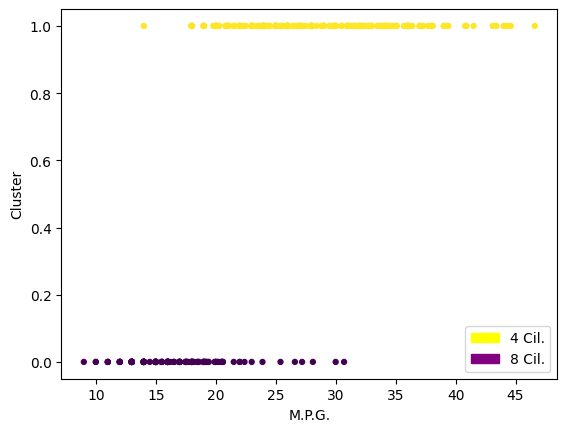

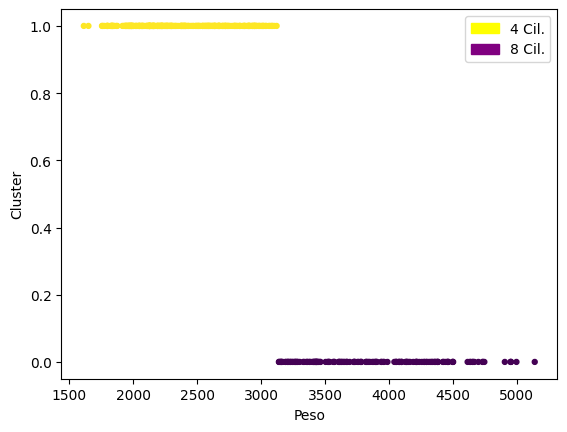

In [11]:
Labels, datos_n= pd.DataFrame({"Clusters":SKL_Labels}), pd.DataFrame.reset_index(datos)
labelF= pd.concat((datos_n,Labels), axis=1)
datosF= labelF.drop(columns="index")

plt.scatter(datosF['mpg'],datosF["Clusters"], marker=".", c=SKL_Labels, s=50)
c8,c4 = mpatches.Patch(color='yellow', label='4 Cil.'), mpatches.Patch(color='purple', label='8 Cil.')
plt.legend(handles=[c8,c4],loc=4)
plt.ylabel('Cluster')
plt.xlabel('M.P.G.')
plt.show()

plt.scatter(datosF['weight'],datosF["Clusters"], marker=".", c=SKL_Labels, s=50)
c8,c4 = mpatches.Patch(color='yellow', label='4 Cil.'), mpatches.Patch(color='purple', label='8 Cil.')
plt.legend(handles=[c8,c4],loc=1)
plt.ylabel('Cluster')
plt.xlabel('Peso')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

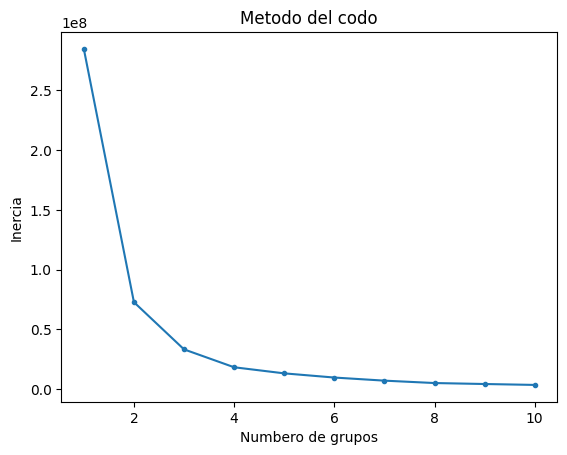

In [12]:
#Metodo del codo
Inercia = []
for k in range(1, 11):
    datosd = datos.drop(columns=["cylinders"])
    SKL_Means = KMeans(n_clusters=k, init = 'k-means++', max_iter = 300, random_state=1).fit(datosd)
    Inercia.append(SKL_Means.inertia_)

plt.plot(range(1, 11), Inercia, marker='.')
plt.title('Metodo del codo')
plt.xlabel('Numbero de grupos')
plt.ylabel('Inercia')
plt.show()

,mpg,cylinders,weight,Clusters
0,18.0,8,3504,0
1,15.0,8,3693,0
2,18.0,8,3436,0
3,16.0,8,3433,0
4,17.0,8,3449,0
...,...,...,...,...
393,27.0,4,2790,1
394,44.0,4,2130,1
395,32.0,4,2295,1
396,28.0,4,2625,1
